In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data =pd.read_csv(r"JEENEET_NoRT.csv",sep=',' , encoding='latin-1')
data.head(5)

,user,tweets,location
0,Vasunda99956946,@AUThackeray @iAditiTatkare Sir please tweet s...,NaN
1,MrBean28867534,Guy's let's show them.. Make this a dresscode....,NaN
2,Postpon_NEETJEE,@ishkarnBHANDARI @anubha1812 ma'am please requ...,NaN
3,JagadeeshVavili,#StudentsDislikePMModi\nMy request to all #jee...,NaN
4,Deepakjjat,@anubha1812 #jeeneet notice== #Silently break ...,NaN


In [3]:
tweet=pd.DataFrame(data.tweets)
tweet.head()

,tweets
0,@AUThackeray @iAditiTatkare Sir please tweet s...
1,Guy's let's show them.. Make this a dresscode....
2,@ishkarnBHANDARI @anubha1812 ma'am please requ...
3,#StudentsDislikePMModi\nMy request to all #jee...
4,@anubha1812 #jeeneet notice== #Silently break ...


In [4]:
tweet.iloc[5,0]

"@anubha1812 #jeeneet notice== #Silently break the wire of mouse after giving exams. They won't notice it..... Aur pâ\x80¦ https://t.co/3txkYBxUuH"

### To Remove Accent Letter

In [5]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [6]:
tweet['tweets'] = (tweet['tweets'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

In [7]:
tweet.iloc[5,0]

"@anubha1812 #jeeneet notice== #Silently break the wire of mouse after giving exams. They won't notice it..... Aur pa https://t.co/3txkYBxUuH"

### Removing URL 

In [8]:
tweet['tweets'] = tweet['tweets'].str.replace(r'http\S+|www.\S+','',case=False)

In [9]:
tweet.iloc[5,0]

"@anubha1812 #jeeneet notice== #Silently break the wire of mouse after giving exams. They won't notice it..... Aur pa "

### Removing Numbers

In [10]:
tweet['tweets'] = tweet['tweets'].str.replace('\d+', '')

In [11]:
tweet.iloc[5,0]

"@anubha #jeeneet notice== #Silently break the wire of mouse after giving exams. They won't notice it..... Aur pa "

###  Converting to Lower String

In [12]:
tweet.tweets=tweet.tweets.str.lower()

In [13]:
tweet.iloc[5,0]

"@anubha #jeeneet notice== #silently break the wire of mouse after giving exams. they won't notice it..... aur pa "

### Removing Stop Words and Punctuation

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [15]:
custom_list = set(stopwords.words('english')+list(punctuation))
custom_list

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [16]:
tweet['tweets'] = tweet['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (custom_list)]))

### Additional Cleaning

In [17]:
words = set(nltk.corpus.words.words())

In [18]:
def clean_text(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('jeeneet|exams|exam|neet', '', text)
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

cleaned = lambda x: clean_text(x)

In [19]:
tweet.iloc[5,0]

'@anubha #jeeneet notice== #silently break wire mouse giving exams. notice it..... aur pa'

In [20]:
tweet = pd.DataFrame(tweet.tweets.apply(cleaned))
tweet.iloc[5,0]

'notice silently break wire mouse giving notice'

### Stemming and Lemmatization

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [22]:
ps = PorterStemmer()
def stemmer(text):
    return [ ps.stem(word) for word in word_tokenize(text)]

In [23]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [24]:
def lemmatizer(text):
    return [ wnl.lemmatize(word) for word in word_tokenize(text)]

In [25]:
tweet['tweets'] = tweet.tweets.apply(lemmatizer)
tweet.head(5)

,tweets
0,"[sir, please, tweet, something]"
1,"[guy, let, show, them, make, could, wear, blac..."
2,"[please, request, sir, file, fresh, petition, ..."
3,"[request, that, wear, black, dress, show, goa]"
4,"[notice, silently, break, wire, mouse, giving,..."


In [26]:
tweet['tweets'] = tweet.tweets.apply(' '.join)
tweet.head()

,tweets
0,sir please tweet something
1,guy let show them make could wear black shirt ...
2,please request sir file fresh petition regardi...
3,request that wear black dress show goa
4,notice silently break wire mouse giving notice


In [27]:
#tweet['tweets'] = tweet.tweets.apply(stemmer)
#tweet.head(5)

In [28]:
#tweet['tweets'] = tweet.tweets.apply(' '.join)
#tweet.head()

In [29]:
tweet['tweets'] = (tweet['tweets'].astype("str")
                              .str.rstrip())
tweet.head()

,tweets
0,sir please tweet something
1,guy let show them make could wear black shirt ...
2,please request sir file fresh petition regardi...
3,request that wear black dress show goa
4,notice silently break wire mouse giving notice


### Sentiment Analysis

In [30]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
tweet['polarity'] = tweet['tweets'].apply(pol)
tweet.head(5)

,tweets,polarity
0,sir please tweet something,0.000000
1,guy let show them make could wear black shirt ...,-0.166667
2,please request sir file fresh petition regardi...,0.300000
3,request that wear black dress show goa,-0.166667
4,notice silently break wire mouse giving notice,0.000000


In [31]:
tweet['Sentiment'] = np.where(tweet.polarity< 0, 'Negative',
                           np.where(tweet.polarity> 0,'Positve', 'Neutral'))
tweet.head(5)

,tweets,polarity,Sentiment
0,sir please tweet something,0.000000,Neutral
1,guy let show them make could wear black shirt ...,-0.166667,Negative
2,please request sir file fresh petition regardi...,0.300000,Positve
3,request that wear black dress show goa,-0.166667,Negative
4,notice silently break wire mouse giving notice,0.000000,Neutral


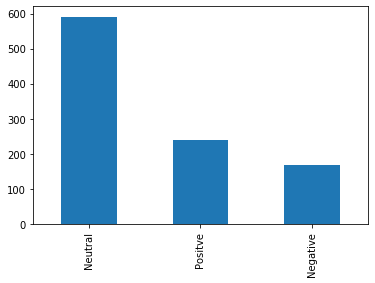

In [32]:
tweet.Sentiment.value_counts().plot.bar()

### CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
tweet_cv = cv.fit_transform(tweet.tweets)
dtm = pd.DataFrame(tweet_cv.toarray(), columns=cv.get_feature_names())


tdm =dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
tdm['freq'] = tdm.sum(axis=1)

In [35]:
tdm.reset_index(inplace=True)


In [36]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
tdm1.head(20)

,Word,freq
101,beginning,93
930,sir,82
762,postpone,80
211,corona,78
976,student,77
640,minister,67
51,anger,59
1145,yesterday,59
314,education,59
582,little,58


In [44]:
w = tdm1[tdm1['freq'] >=40] 
w

,Word,freq
101,beginning,93
930,sir,82
762,postpone,80
211,corona,78
976,student,77
640,minister,67
51,anger,59
1145,yesterday,59
314,education,59
582,little,58


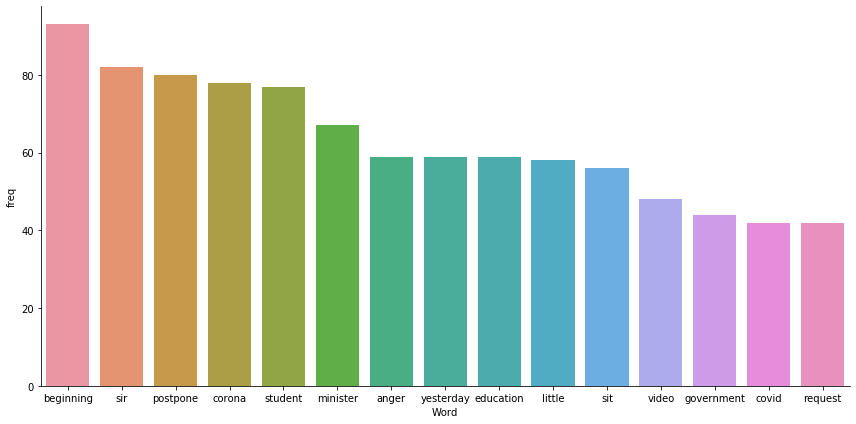

In [45]:
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

### WordCloud

In [40]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [41]:
text = " ".join(review for review in tweet.tweets)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 34067 words in the combination of all review.


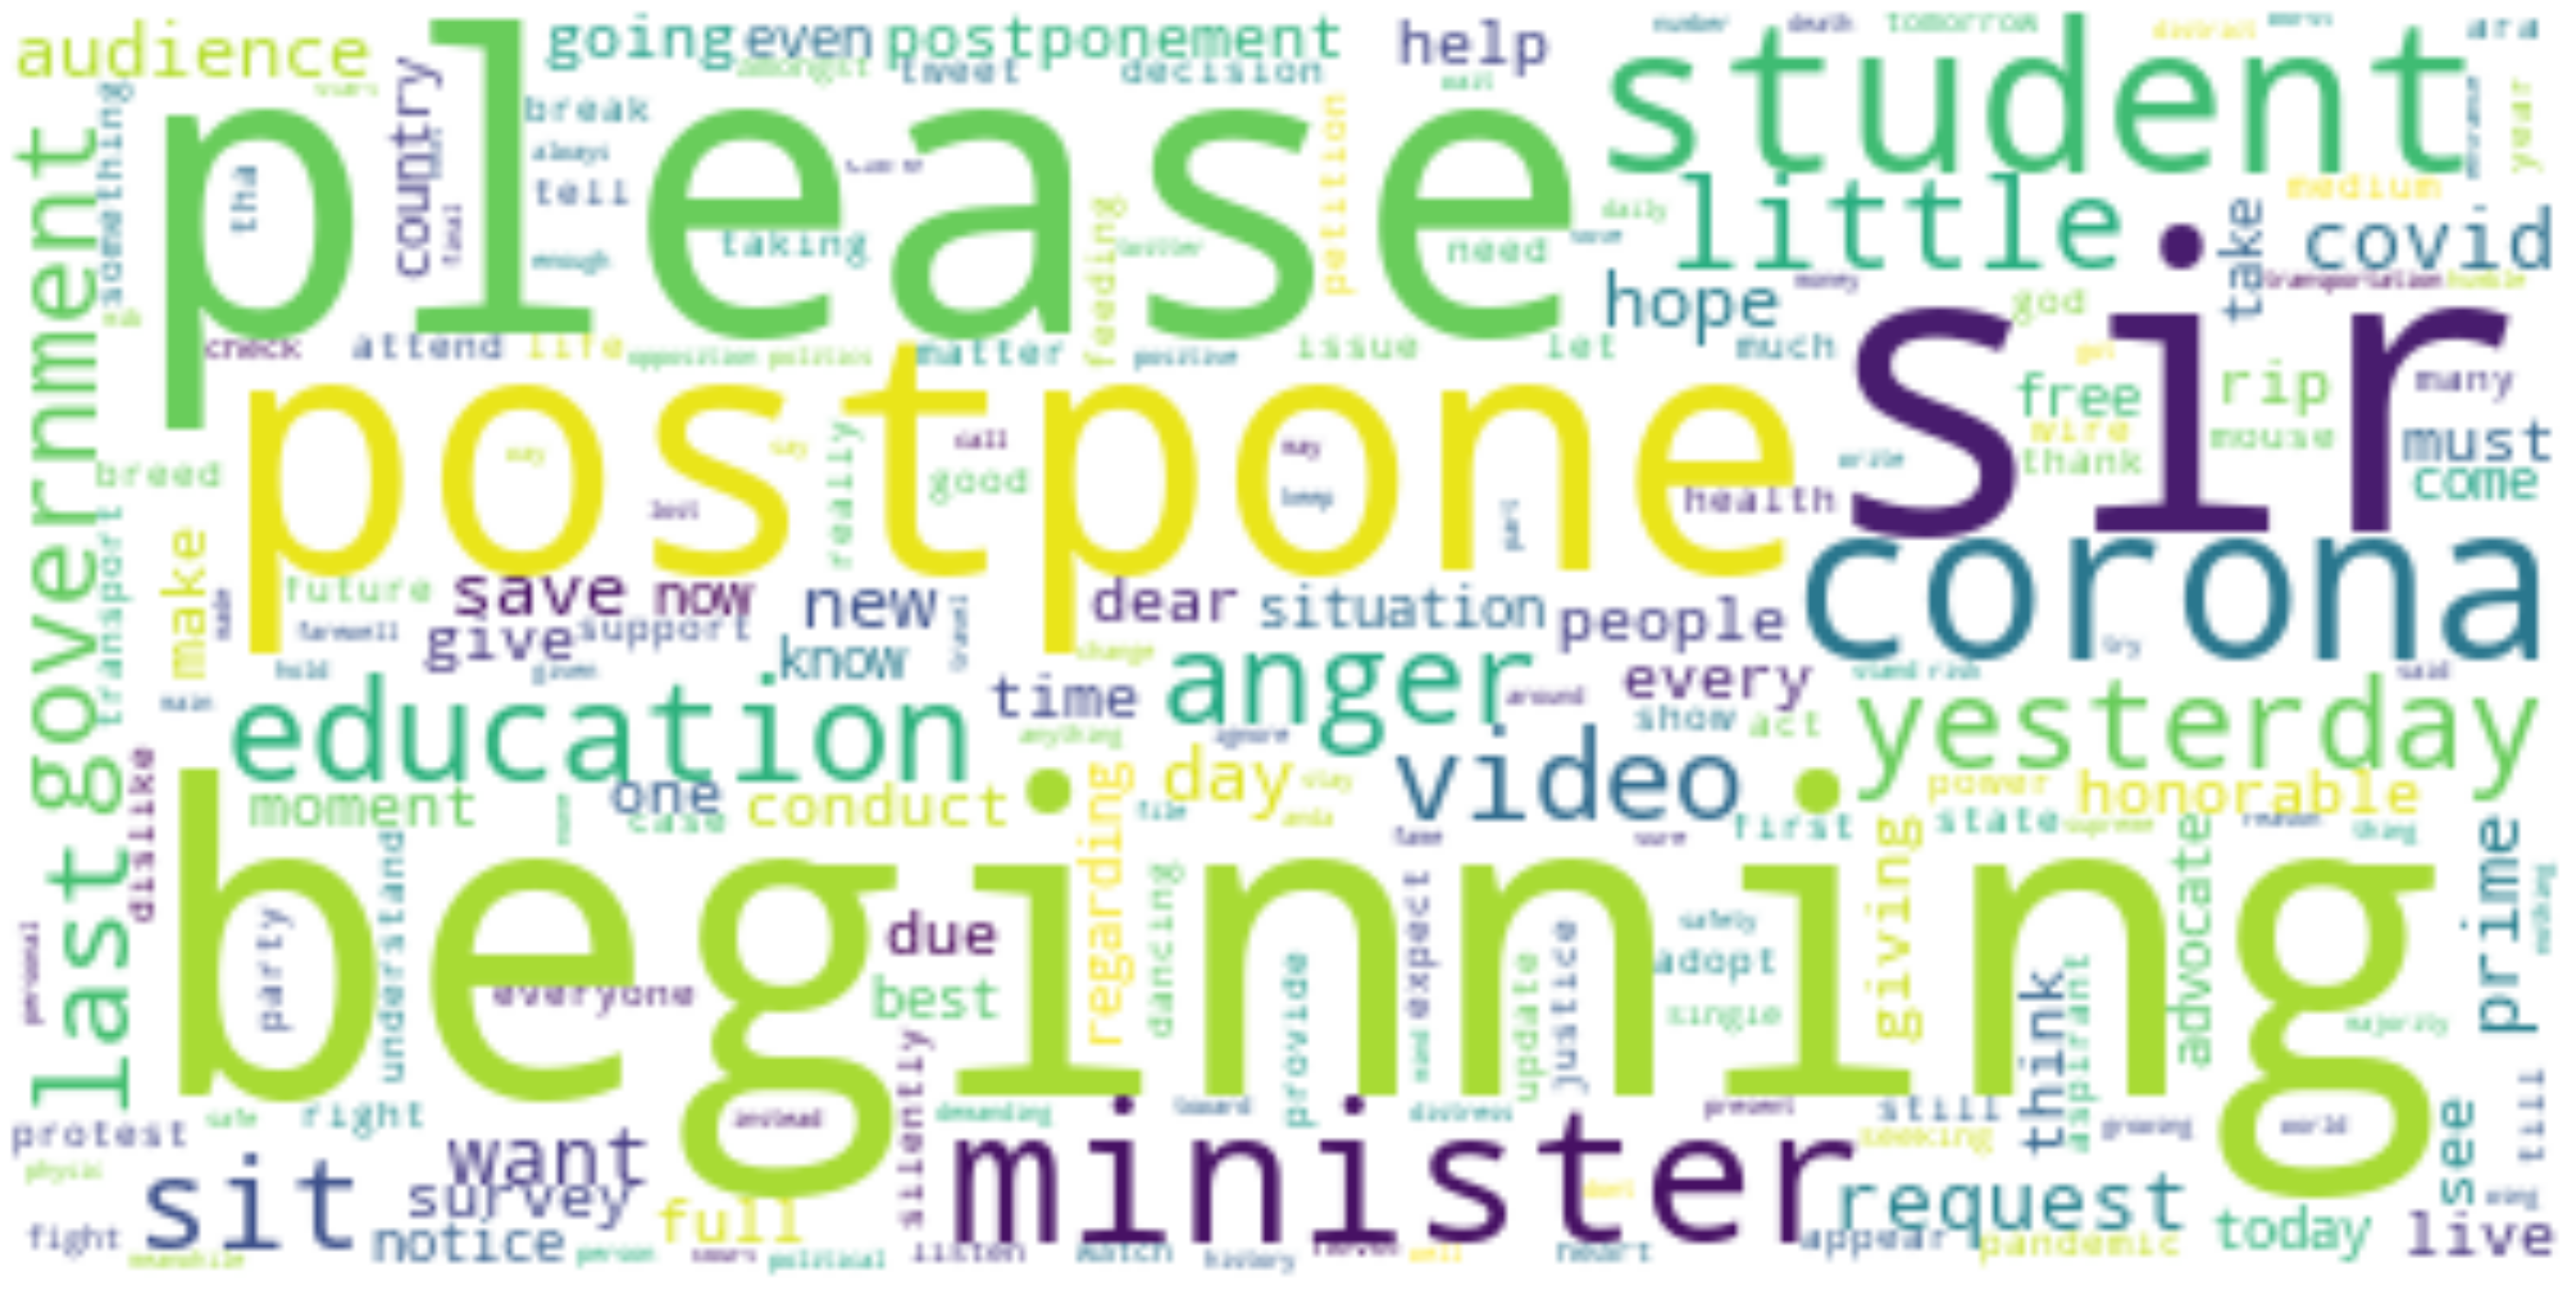

In [53]:

wordcloud_full = WordCloud(background_color="white",
                          mode="RGBA",collocations=False).generate(text)

plt.figure(figsize=[50,50])
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()